Pengecekan Penyakit Diabetes Menggunakan Metode Random Forest 
Data ini diperoleh dari Pima Indians Diabetes Database. Dataset ini berjumlah 768 dengan 8 feature data. Berikut ini deskripsi dari kolom yang digunakan.
1.Berapa kali hamil?
2.Konsentrasi glukosa plasma 2 jam dalam tes toleransi glukosa
3.Tekanan darah diastolik (mm Hg)
4.Ketebalan lipatan kulit trisep (mm)
5.Insulin serum 2 jam (mu U / ml)
6.Indeks massa tubuh (berat dalam kg / (tinggi dalam m) ^ 2)
7.Fungsi silsilah diabetes
8.Umur (tahun)
9.Variabel kelas (0 atau 1) maka 0 berarti normal, dan 1 berarti positif diabetes


In [53]:
#Library untuk load dataset
import pandas as pd
df = pd.read_csv("diabetes.csv", sep = ';')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Type,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetes,1
1,1,85,66,29,0,26.6,0.351,31,Normal,0
2,8,183,64,0,0,23.3,0.672,32,Diabetes,1
3,1,89,66,23,94,28.1,0.167,21,Normal,0
4,0,137,40,35,168,43.1,2.288,33,Diabetes,1


In [55]:
#Info dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Type                      768 non-null    object 
 9   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


In [56]:
#Deskripsi dari datase
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [57]:
#Menghapus Outcome dan akan diganti outputnya berdasarkan Tipe
df.drop("Outcome",1,inplace=True)

In [58]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Type
0,6,148,72,35,0,33.6,0.627,50,Diabetes
1,1,85,66,29,0,26.6,0.351,31,Normal
2,8,183,64,0,0,23.3,0.672,32,Diabetes
3,1,89,66,23,94,28.1,0.167,21,Normal
4,0,137,40,35,168,43.1,2.288,33,Diabetes


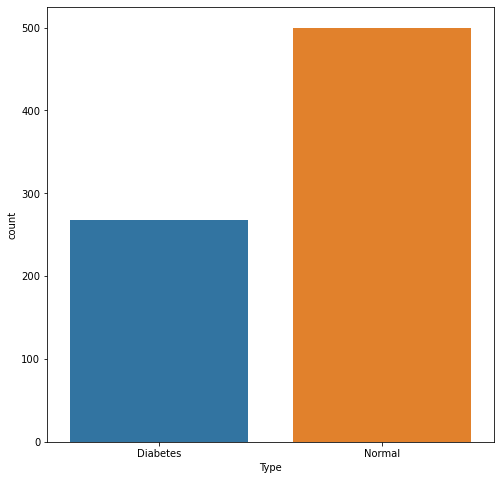

In [61]:
#Visualisasi data untuk mengetahui jumlah orang yang terkena diabetes dan jumlah orang yang normal
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.countplot(df['Type'])

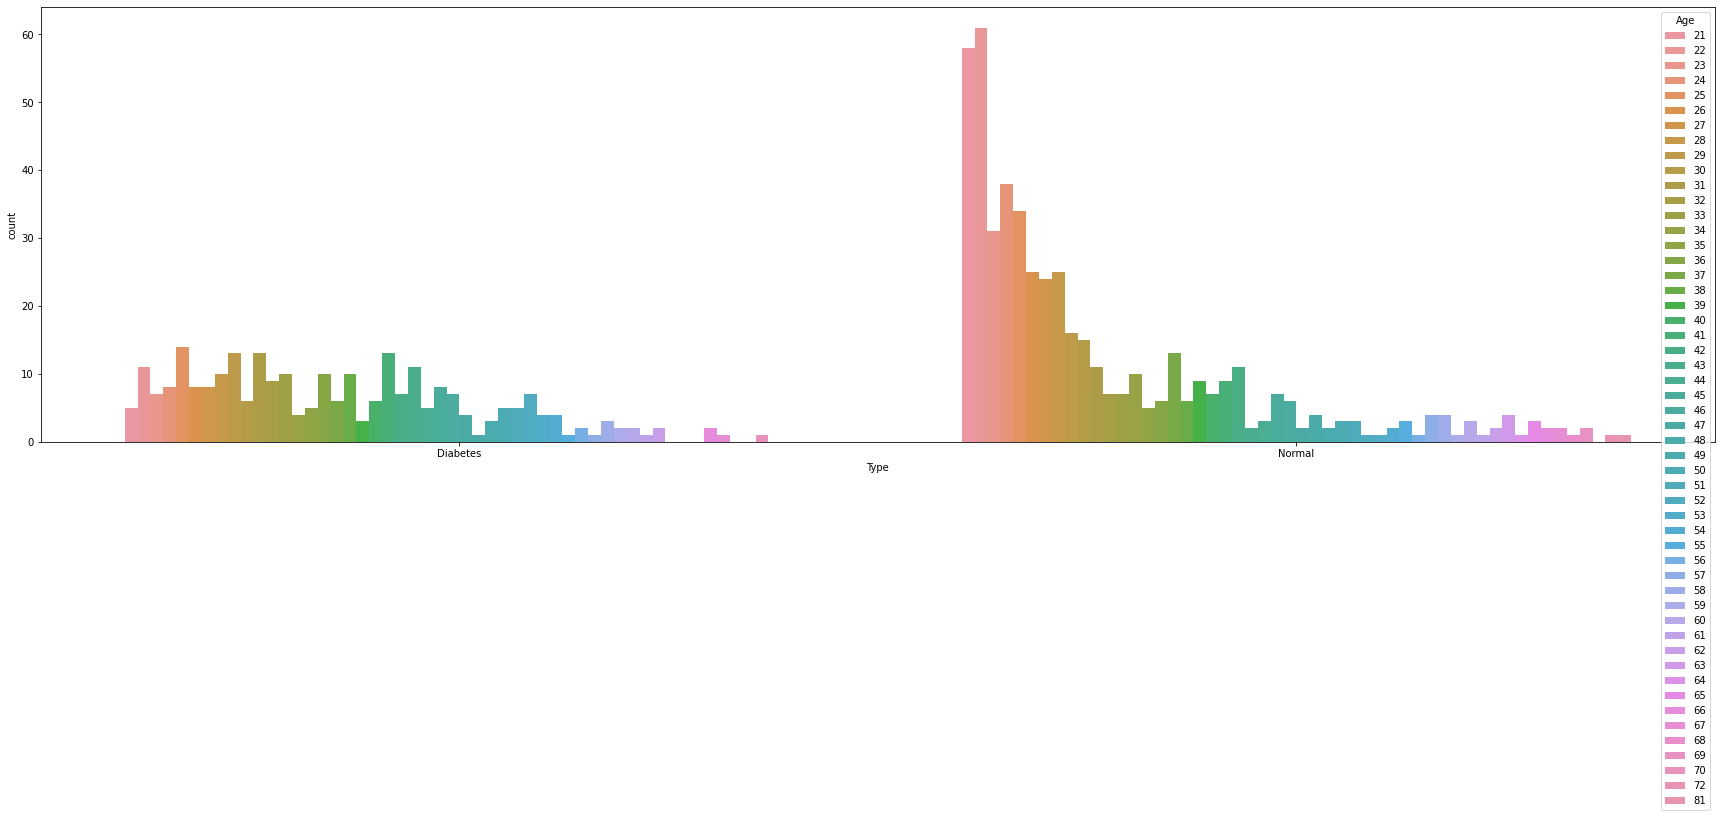

In [62]:
#Visualisasi data untuk mengetahui jumlah yang terkena diabetes dan yang normal berdasarkan usia
plt.figure(figsize=(30,8))
sns.countplot(df['Type'], hue=df['Age'])

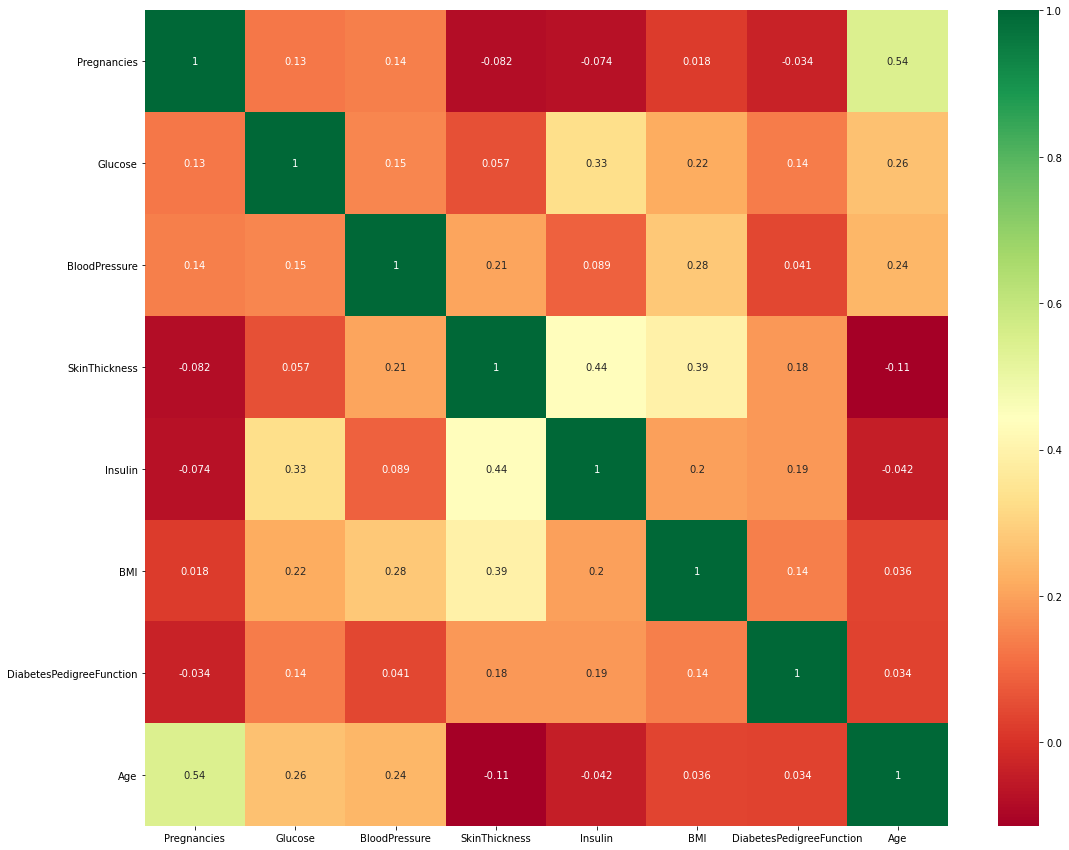

In [63]:
#Visualisasi untuk korelasi data
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn')

In [64]:
#Libraries untuk machine learning
from sklearn.ensemble import RandomForestClassifier
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Type']

In [66]:
#Membagi data training dan data testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [67]:
#Metode yang digunakan adalah Random Forest Classifier
model = RandomForestClassifier(n_estimators = 1000, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [26]:
#Akurasi dari data training
model.score(X_train, y_train)

1.0

In [69]:
#Menguji data dengan menggunakan data testing
y_predict = model.predict(X_test)

In [70]:
#Mengetahui akurasi dari data testing dan data prediksi
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

    Diabetes       0.78      0.69      0.73        55
      Normal       0.84      0.89      0.86        99

    accuracy                           0.82       154
   macro avg       0.81      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154



[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Diabetes')]

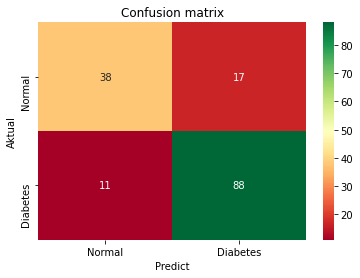

In [71]:
#Menggunakan konfusion matriks untuk mengetahui false positif dan false negative dari data Testing
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_predict)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap = 'RdYlGn')

ax.set_xlabel("Predict")
ax.set_ylabel("Aktual")
ax.set_title("Confusion matrix")
ax.xaxis.set_ticklabels(["Normal", "Diabetes"])
ax.yaxis.set_ticklabels(["Normal", "Diabetes"])

In [72]:
#Menyimpan model machine learning
import pickle
model_name  = 'model_diabetes.pkl'
pickle.dump(model, open(model_name, 'wb'))
print("[INFO]: Model telah tersimpan ...")

[INFO]: Model telah tersimpan ...


In [73]:
#Test model
input_data = pickle.load(open(model_name, 'rb'))
Pregnancies = int (input("Enter pregnacies: "))
Glucose = int(input("Glucose: "))
BloodPressure = int(input("BloodPressure: "))
SkinThickness = int(input("SkinThickness: "))
Insulin = int(input("Insulin: "))
BMI = float(input("BMI: "))
DiabetesPedigreeFunction = float(input("Diabetes Pedigree Function: "))
Age = int(input("Age: "))
result = model.predict([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,
       BMI, DiabetesPedigreeFunction, Age]])[0]
print("Output: ", result)

Enter pregnacies: 6
Glucose: 60
BloodPressure: 80
SkinThickness: 35
Insulin: 0
BMI: 36
Diabetes Pedigree Function: 0.211
Age: 45
Output:  Normal
